# Hierarchial relation

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

# Demo

# High number of samples

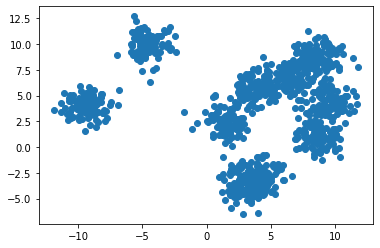

In [2]:
X, y = make_blobs(n_samples = 1000, centers=10,
                 n_features =2, random_state=660)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
# Generate distance matrix with linkage function
distances = linkage(X, method="centroid", metric="euclidean")
print (distances)

[[3.86000000e+02 5.66000000e+02 5.42426969e-03 2.00000000e+00]
 [6.70000000e+01 1.60000000e+02 6.78307987e-03 2.00000000e+00]
 [2.81000000e+02 4.52000000e+02 8.23976887e-03 2.00000000e+00]
 ...
 [1.98400000e+03 1.98800000e+03 7.67024886e+00 2.00000000e+02]
 [1.98900000e+03 1.99500000e+03 8.80810037e+00 8.00000000e+02]
 [1.99600000e+03 1.99700000e+03 1.33931517e+01 1.00000000e+03]]


In [4]:
#Take normal dendroram output 
def annotated_dendrogram (*args, **kwargs):
    scipy_dendro = dendrogram(*args, truncate_mode='lastp', 
                              show_contracted=True,
                              leaf_rotation=90)
    plt.title("Blob Data Dendrogram")
    plt.xlabel('cluster size')
    plt.ylabel('distance')
    for i, d, c in zip(scipy_dendro['icoord'], 
                       scipy_dendro['dcoord'], 
                       scipy_dendro['color_list']):
        x = 0.5* sum(i[1:3])
        y= d[1]
        if y>10:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), 
                         textcoords='offset points', 
                         va='top', ha='center')
    return scipy_dendro
            

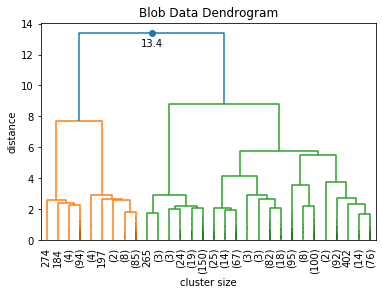

In [5]:
dn = annotated_dendrogram(distances)
plt.show()

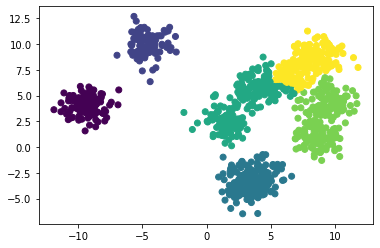

In [6]:
scipy_clusters = fcluster(distances, 5, criterion="distance")
plt.scatter(X[:,0], X[:,1], c=scipy_clusters)
plt.show()

# Linkage

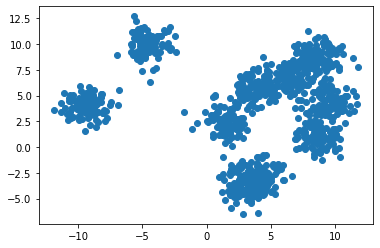

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [10]:
methods = ['centroid', 'single', 'complete', 'average', 'weighted']

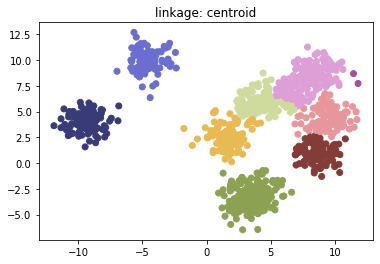

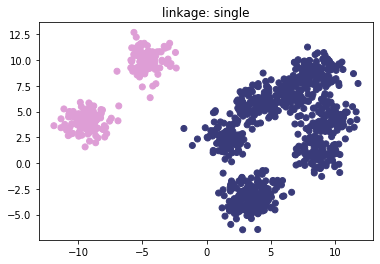

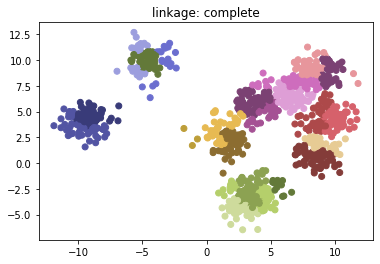

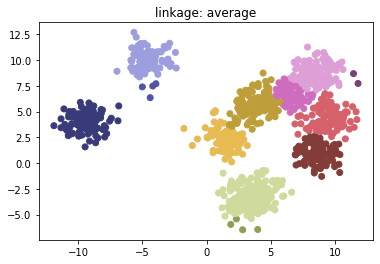

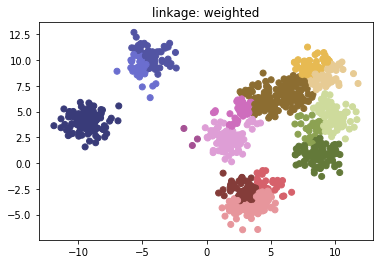

In [11]:
for method in methods:
    distances = linkage(X, method=method, metric='euclidean')
    clusters = fcluster(distances, 3, criterion="distance")
    plt.title('linkage: '+ method )
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20b')
    plt.show()

## Agglomerative Clustering with sklearn

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
distances = linkage(X, method='centroid', metric='euclidean')
sklearn_clusters = ac.fit_predict(X)
scipy_clusters = fcluster(distances, 3, criterion="distance") 

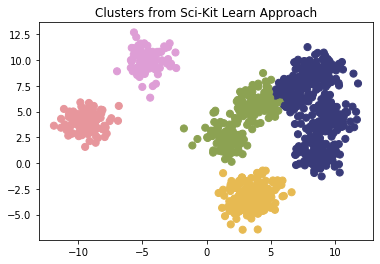

In [19]:
plt.figure(figsize=(6,4))
plt.title("Clusters from Sci-Kit Learn Approach")
plt.scatter(X[:, 0], X[:, 1], c = sklearn_clusters ,s=50, cmap='tab20b')
plt.show()

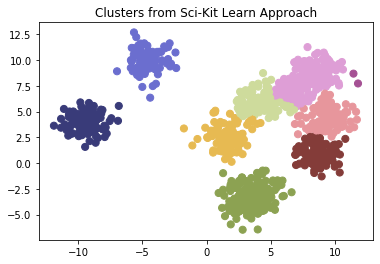

In [21]:
plt.figure(figsize=(6,4))
plt.title("Clusters from Sci-Kit Learn Approach")
plt.scatter(X[:, 0], X[:, 1], c = scipy_clusters ,s=50, cmap='tab20b')
plt.show()